##### Importância dos "Features" para a Variável Alvo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../data/processed/dataset_transformado.csv")

##### Configuração Inicial

In [3]:
X = df.drop('DoencaCardiaca', axis=1)
y = df['DoencaCardiaca']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### RandomForest

In [5]:
model = RandomForestClassifier(random_state=101)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [6]:
importances = model.feature_importances_
feature_names = X.columns

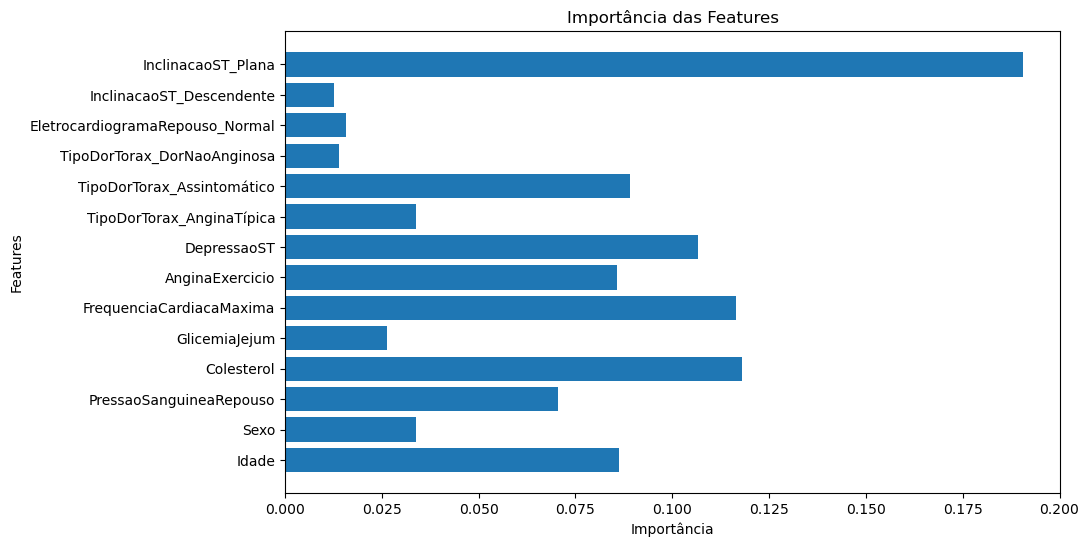

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features')
plt.show()

##### DecisionTree

In [8]:
model = DecisionTreeClassifier(random_state=101)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [9]:
importances = model.feature_importances_
feature_names = X.columns

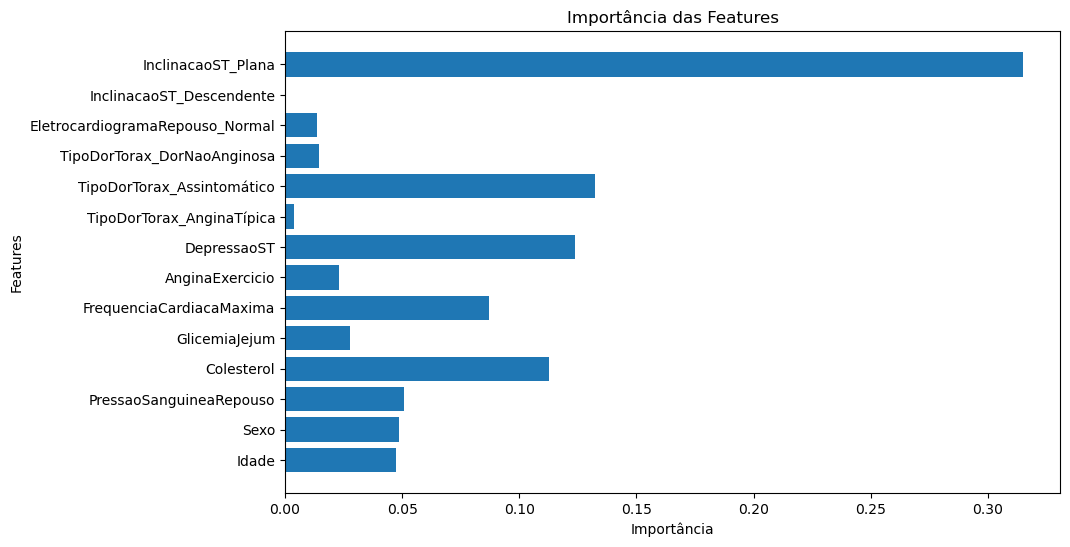

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features')
plt.show()

##### LogisticRegression

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
coefficients = model.coef_[0]
feature_names = X.columns

In [13]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

In [23]:
coef_df

,Feature,Coefficient
13,InclinacaoST_Plana,2.433624
1,Sexo,1.356757
9,TipoDorTorax_Assintomático,1.023084
6,AnginaExercicio,0.991506
4,GlicemiaJejum,0.975785
12,InclinacaoST_Descendente,0.912385
7,DepressaoST,0.343584
0,Idade,0.013822
2,PressaoSanguineaRepouso,0.003766
3,Colesterol,-0.004854


##### Permutation Importance

In [15]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

In [16]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [22]:
importance_df

,Feature,Importance
13,InclinacaoST_Plana,0.086956
9,TipoDorTorax_Assintomático,0.028149
1,Sexo,0.019747
4,GlicemiaJejum,0.013008
7,DepressaoST,0.012743
6,AnginaExercicio,0.007836
3,Colesterol,0.004641
10,TipoDorTorax_DorNaoAnginosa,0.004147
8,TipoDorTorax_AnginaTípica,0.003725
12,InclinacaoST_Descendente,0.002773


##### Análise de Correlação por Classe

In [18]:
df_class_0 = df[df['DoencaCardiaca'] == 0].drop(columns=['DoencaCardiaca'])
df_class_1 = df[df['DoencaCardiaca'] == 1].drop(columns=['DoencaCardiaca'])

In [19]:
corr_class_0 = df_class_0.corr()
corr_class_1 = df_class_1.corr()

In [20]:
corr_df = pd.DataFrame({'Feature': df_class_0.columns, 
                        'Corr_Class_0': corr_class_0.mean(axis=1), 
                        'Corr_Class_1': corr_class_1.mean(axis=1)})

In [21]:
corr_df

,Feature,Corr_Class_0,Corr_Class_1
Idade,Idade,0.102151,0.075819
Sexo,Sexo,0.065102,0.040227
PressaoSanguineaRepouso,PressaoSanguineaRepouso,0.096968,0.104846
Colesterol,Colesterol,0.066944,0.089537
GlicemiaJejum,GlicemiaJejum,0.106778,0.033865
FrequenciaCardiacaMaxima,FrequenciaCardiacaMaxima,0.021216,0.010641
AnginaExercicio,AnginaExercicio,0.116132,0.105927
DepressaoST,DepressaoST,0.153772,0.126185
TipoDorTorax_AnginaTípica,TipoDorTorax_AnginaTípica,-0.045004,0.030527
TipoDorTorax_Assintomático,TipoDorTorax_Assintomático,0.029972,0.001985
